In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)
fpp_all.count()

koi.1                    8826
rprs                     8394
secthresh                8394
maxrad                   8394
pr_heb                   8039
pr_eb                    8039
pr_beb                   8039
L_tot                    8174
fp                       8174
FPP                      8039
kepid                    8826
period                   8826
rp                       8279
disposition              8826
prob_ontarget            6787
pos_prob_score           7470
not_transitlike          8826
significant_secondary    8826
centroid_offset          8826
ephem_match              8826
exception                 652
dtype: int64

In [3]:
fpp_all.groupby('exception').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_eb,pr_beb,L_tot,fp,FPP,kepid,period,rp,disposition,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match
exception,,,,,,,,,,,,,,,,,,,,
2015-08-13,13,13,13,13,0,0,0,0,0,0,13,13,13,13,6,6,13,13,13,13
AllWithinRocheError,52,52,52,52,0,0,0,0,0,0,52,52,51,52,34,44,52,52,52,52
BadRoweFitError,216,0,0,0,0,0,0,0,0,0,216,216,0,216,135,175,216,216,216,216
EmptyPhotometryError,38,0,0,0,0,0,0,0,0,0,38,38,0,38,20,23,38,38,38,38
EmptyPopulationError,17,17,17,17,0,0,0,0,0,0,17,17,17,17,0,17,17,17,17,17
KeyError,3,3,3,3,0,0,0,0,0,0,3,3,2,3,0,0,3,3,3,3
MCMCError,32,31,31,31,0,0,0,0,0,0,32,32,31,32,12,14,32,32,32,32
MissingKOIError,9,0,0,0,0,0,0,0,0,0,9,9,0,9,3,3,9,9,9,9
MissingStellarError,98,98,98,98,0,0,0,0,0,0,98,98,0,98,40,80,98,98,98,98


In [15]:
np.savetxt('empty_photometry.txt',fpp_all.query('exception == "EmptyPhotometryError"')['koi.1'], fmt='%s')
np.savetxt('missing_koi.txt',fpp_all.query('exception == "MissingKOIError"')['koi.1'], fmt='%s')


In [9]:
fpp_all.columns

Index([u'koi.1', u'rprs', u'secthresh', u'maxrad', u'pr_heb', u'pr_eb',
       u'pr_beb', u'L_tot', u'fp', u'FPP', u'kepid', u'period', u'rp',
       u'disposition', u'prob_ontarget', u'pos_prob_score', u'not_transitlike',
       u'significant_secondary', u'centroid_offset', u'ephem_match',
       u'exception'],
      dtype='object')

In [4]:
#%%file write_fpptable_tex.py
#!/usr/bin/env python

import pandas as pd
import numpy as np

def write_fpptable_tex(nrows=55, istart=3000):
    fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)
    
    columns = ['koi.1', 'period', 'rp', 'secthresh',
              'maxrad', 
              'pr_eb', 'pr_heb', 'pr_beb', 'L_tot',
              'fp', 
              'prob_ontarget','pos_prob_score', 
               'disposition', 'FPP',
              'exception']

    # Failure classes:
    #  1:  No MCMC modeling from JRowe (MissingKOIError, EmptyPhotometryError)
    #  2:  Bad MCMC model from JRowe (BadRoweFitError)
    #  3:  No stellar params from Huber table (MissingStellarError)
    #  4:  No weak secondary data (NoWeakSecondaryError)
    #  5:  MCMC trapezoid fit did not converge (MCMCError)
    #  6:  Period too short for implied star (AllWithinRocheError)
    #  7:  Other (EmptyPopulationError, ValueError, ZeroDivisionError)
    exceptions = {'AllWithinRocheError': 6,
                 'BadRoweFitError': 2,
                 'EmptyPhotometryError': 1,
                 'EmptyPopulationError': 7,
                 'MCMCError': 5,
                 'MissingKOIError': 1,
                 'MissingStellarError': 3,
                 'NoWeakSecondaryError': 4,
                 'ValueError': 7,
                 'ZeroDivisionError': 7}
    
    formats = {'koi.1':'{:s}',
                'disposition':'{:s}',
                'period':'{:.3f}',
                'rp':'{:.2f}',
                'secthresh':'{:.0f}',
                'maxrad':'{:.2f}',
                'pr_heb':'{:.2g}',
                'pr_eb':'{:.2g}',
                'pr_beb':'{:.2g}',
                'pr_heb':'{:.2g}',
                'L_tot':'{:.2g}',
                'fp':'{:.3f}',
                 'FPP':'{:.2g}',
             'kepid':'{:.0f}',
             'prob_ontarget':'{:.2f}',
             'pos_prob_score':'{:.2f}',
             'exception':'{}'
               }

    
    fout = open('table_fpp.tex','w')
    fout.write("""
\\begin{deluxetable*}{lcccccccccccccc}
\\tablewidth{0pt}
\\tabletypesize{\scriptsize}
\\tablecaption{False Positive Probability Results
\label{table:fpp}}
\\tablehead{\\colhead{KOI} &
    \\colhead{$P$} &
    \\colhead{$R_p$} &
    \\colhead{$\\delta_{\\rm sec}$\\tablenotemark{a}} &
    \\colhead{$r_{\\rm excl}$\\tablenotemark{b}} &
    \\colhead{Pr$_{\\rm EB}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm HEB}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm BEB}$\\tablenotemark{c}} &
    \\colhead{$\mathcal L_{\\rm tot}$\\tablenotemark{d}}&
    \\colhead{$f_p$\\tablenotemark{e}} &
    \\colhead{$p_{\\rm pos}$\\tablenotemark{f}} &
    \\colhead{$s_{\\rm pos}$\\tablenotemark{g}} &
    \\colhead{Disp.\\tablenotemark{h}} &
    \\colhead{FPP\\tablenotemark{i}} &
    \\colhead{Failure\\tablenotemark{j}} \\\\
    \\colhead{} &
    \\colhead{(d)} &
    \\colhead{($R_\\oplus$)} &
    \\colhead{(ppm)} &
    \\colhead{(\\arcsec)} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{}
    }
\\startdata
"""
        )
    for i in range(istart, istart+nrows):
        line = ''
        for c in columns:
            val = fpp_all.iloc[i][c]
            
            try:
                if np.isnan(val):
                    val = '--'
            except:
                pass
                
            if c=='exception':
                if val != '--':
                    val = exceptions[val]
                
            elif c=='disposition':
                if val=='CANDIDATE':
                    val = 'CA'
                elif val=='FALSE POSITIVE':
                    val = 'FP'
                elif val=='CONFIRMED':
                    val = 'PL'
            
            try:
                if c != 'Ltot':
                    if val < 1e-5:
                        val = 1e-5
            except:
                pass

            try:
                line += '{} & '.format(formats[c]).format(val)
            except ValueError:
                line += '{} & '.format(val)
                
                
        line = line[:-2]
        if i != istart+nrows-1:
            line += '\\\\ '
        line += '\n'
        fout.write(line)
    fout.write("""\\enddata
\\tablecomments{A portion of this table is shown for form and content.  
                The full table will be available online.}
\\tablenotetext{a}{Maximum secondary eclipse depth allowed.}
\\tablenotetext{b}{``Exclusion radius'' inside of which false positive scenarios are allowed.}
\\tablenotetext{c}{Probabilities for different astrophysical false positive scenarios: 
                unblended eclipsing binary (EB), hierarchical eclipsing binary (HEB),
                and background/foreground eclipsing binary (BEB).}
\\tablenotetext{d}{Sum of likelihood $\\times$ prior for all models.  A very low
                    value here indicates that no model gives a good fit, so a low
                    FPP should be interpreted cautiously.}
\\tablenotetext{e}{Assumed ``specific planet occurrence rate'' for this planet.}
\\tablenotetext{f}{Probability of signal to be on target star, according to Bryson et al.~(2015, in prep).}
\\tablenotetext{g}{Positional probability score, from Bryson et al. (2015).}
\\tablenotetext{h}{Exoplanet Archive disposition: false positive (FP), candidate (CA), or confirmed (PL).}
\\tablenotetext{i}{False positive probability.}
\\tablenotetext{j}{Reason for failure: (1) No MCMC modeling available from \\citet{Rowe:2015};
    (2)  Unphysical MCMC fit from \\citet{Rowe:2015};
    (3)  No stellar parameters available from \citet{Huber:2014};
    (4)  No weak secondary data available;
    (5)  MCMC trapezoid fit did not converge;
    (6)  Period too short for implied star (orbit within star);
    (7)  Other unspecified \\vespa\\ error.}
\\end{deluxetable*}
"""            )
    fout.close()
    
if __name__=='__main__':
    write_fpptable_tex()

In [8]:
runtime_errors = ["ZeroDivisionError", "ValueError", "MCMCError", "EmptyPopulationError", "AllWithinRocheError"]
len(fpp_all.query('FPP >=0 or exception in ["ZeroDivisionError", "ValueError", "MCMCError", "EmptyPopulationError", "AllWithinRocheError"]'))

7317

In [6]:
df = fpp_all.query('exception == "MissingKOIError" or exception == "EmptyPhotometryError"')
df.groupby('disposition').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_eb,pr_beb,L_tot,fp,FPP,rp,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,exception
disposition,,,,,,,,,,,,,,,,,,
CANDIDATE,111,0,0,0,0,0,0,0,0,0,0,70,81,111,111,111,111,111
CONFIRMED,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
FALSE POSITIVE,897,0,0,0,0,0,0,0,0,0,0,330,374,897,897,897,897,897


In [7]:
df.query('disposition=="CONFIRMED"')

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_eb,pr_beb,L_tot,fp,FPP,rp,disposition,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,exception
koi,,,,,,,,,,,,,,,,,,,
K00245.04,K00245.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONFIRMED,NaN,NaN,False,False,False,False,MissingKOIError


In [12]:
#4115.01 -- variable star?  rprs too big

fpp_all.ix['K07016.01']

koi.1                    K07016.01
rprs                         0.013
secthresh                      120
maxrad                        1.26
pr_heb                    4.04e-10
pr_eb                      0.00044
pr_beb                    0.000411
L_tot                        1.671
fp                            0.16
FPP                        0.00085
rp                        1.528166
disposition              CANDIDATE
prob_ontarget                 0.98
pos_prob_score                0.94
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
exception                      NaN
Name: K07016.01, dtype: object

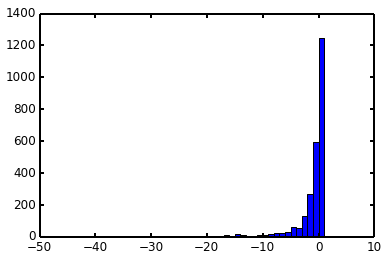

In [117]:
ok = fpp_all['L_tot'] > 0
plt.hist(np.log10(fpp_all[ok]['L_tot']), bins=range(-50,2));

In [5]:
confirmed = fpp_all['disposition'] == 'CONFIRMED'
known_fp = fpp_all['disposition'] == 'FALSE POSITIVE'
candidate = fpp_all['disposition'] == 'CANDIDATE'
low_fpp = fpp_all['FPP'] < 0.01
high_fpp = fpp_all['FPP'] > 0.9
on_target = fpp_all['prob_ontarget'] > 0.99

fpp_calculated = fpp_all[np.isfinite(fpp_all['FPP']) & np.isfinite(fpp_all['rp'])]
d = fpp_calculated

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def fpp_summaryplot(data=fpp_calculated,fig=None,symbol='o',ms=1,color='k',
                    markrs=[1,1.5,2,2.5,3,4,10],nbins=15,alpha=0.5,
                    title=None,hlineval=0.01,labelpos=(0.8,0.08),
                    summarylabel=True,erasedata=None,titlefontsize=20,
                    titlexy=(0.25,0.85), 
                    subquery=None, subcolor='b', **kwargs):
    
    data = data.sort('rp')
    inds = np.arange(len(data))
    data.index = inds
    
    
    ypts = data['FPP'].clip(1e-4,1)
    xpts = np.arange(len(data))
    plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)

    if subquery is not None:
        sub = data.query(subquery)
        suby = sub['FPP'].clip(1e-4, 1)
        subx = sub.index
    
    if erasedata is not None:
        plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)
        if subquery is not None:
            plt.semilogy(subx, suby, ms=ms+1, color=subcolor,
                        mec=subcolor)
        
    plt.ylim(ymin=8e-5)
    xmax = inds.max()+1
    plt.xlim(xmax=xmax)
    plt.xticks([])

    ax = plt.gca()

    plt.axhline(hlineval,color='k',lw=2)

    for r in markrs:
        i = np.argmin(np.absolute(data['rp'][inds]-r))
        ax.axvline(i,color='k',lw=3,ls=':')
        ax.annotate(r'%.1f' % r,xy=(float(i)/xmax,-0.05),xycoords='axes fraction',ha='center',
                    annotation_clip=False,fontsize=14)
        

    if nbins is not None:
        N = len(ypts)
        binsize = N/nbins
        xbins = []
        ybins = []
        yerrs = []
        for i in range(nbins):
            xbins.append((xpts[i*binsize:(i+1)*binsize]).mean())
            ybins.append(np.median(ypts[i*binsize:(i+1)*binsize]))
            yerrs.append((ypts[i*binsize:(i+1)*binsize]).std())
        #plt.errorbar(xbins,ybins,yerr=yerrs,color=linecolor,fmt='o',ms=5)
        plt.plot(xbins,ybins,'wo',ms=15)
        plt.plot(xbins,ybins,'ko',ms=13)
        plt.plot(xbins,ybins,'ro',ms=12)

    plt.xlabel('Planet Radius [$R_\oplus$]',labelpad=30, fontsize=20)
    plt.ylabel('False Positive Probability', fontsize=20)

    if title is not None:
        plt.annotate(title,xy=titlexy,xycoords='axes fraction',
                     fontsize=titlefontsize,
                     bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')

    if summarylabel:
        N = float(len(data))
        gt_50pct = (data['FPP'] > 0.5).sum()
        lt_1pct = (data['FPP'] < 0.01).sum()
        #lt_03pct = (data['FPP'] < 0.003).sum()
        plt.annotate('%i/%i FPP > 50%%\n%i/%i FPP < 1%%' % 
                     (gt_50pct,N,lt_1pct,N),xy=labelpos,xycoords='axes fraction',
                     fontsize=15,bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')


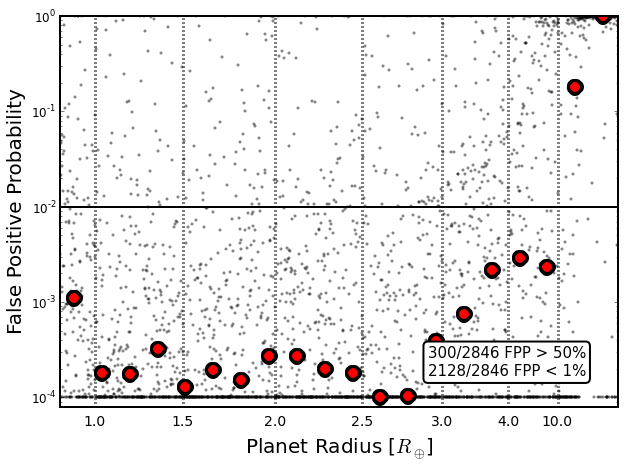

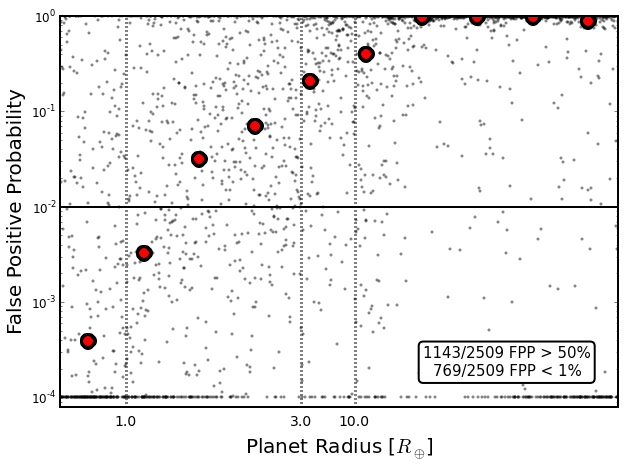

In [8]:
%matplotlib inline
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('disposition != "FALSE POSITIVE" and pos_prob_score > 0.3 and L_tot > 1e-10 and prob_ontarget > 0.99'),
               nbins=20);
plt.savefig('fpp_summary_all.pdf')
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('(disposition == "FALSE POSITIVE") and L_tot > 1e-10'),
               nbins=10, markrs=[1,3,10], subquery='prob_ontarget > 0.99');
plt.savefig('fpp_summary_fp.pdf')

In [2]:
from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

                        
len(starprops), len(sp), len(huber_sp)


(8672, 7417, 7417)

In [57]:
sp.columns

Index([u'koi', u'mass', u'mass_lo', u'mass_hi', u'radius', u'radius_lo', u'radius_hi', u'Teff', u'Teff_lo', u'Teff_hi', u'logg', u'logg_lo', u'logg_hi', u'feh', u'feh_lo', u'feh_hi', u'age', u'age_lo', u'age_hi', u'distance', u'distance_lo', u'distance_hi', u'AV', u'AV_lo', u'AV_hi', u'maxAV', u'Teff_prior_mu', u'Teff_prior_sig', u'logg_prior_mu', u'logg_prior_sig', u'feh_prior_mu', u'feh_prior_sig'], dtype='object')

In [46]:
def valpm(val, lo, hi, fmt=''):
    """Returns LaTeX for val +/- errs
    """
    p_err = '{{{}}}'.format(fmt).format(hi - val)
    m_err = '{{{}}}'.format(fmt).format(val - lo)
    val = '{{{}}}'.format(fmt).format(val)
    return '${{ {} }}^{{ +{} }}_{{ -{} }}$'.format(val, p_err, m_err)

valpm(100.000, 80.124, 120)

'${ 100.0 }^{ +20.0 }_{ -19.876 }$'

In [6]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
from keputils import koiutils as ku
import re

starprops = pd.read_table('starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

def valpm(val, lo, hi, fmt='{}'):
    """Returns LaTeX for val +/- errs
    """
    p_err = '{{{}}}'.format(fmt).format(hi - val)
    m_err = '{{{}}}'.format(fmt).format(val - lo)
    val = '{{{}}}'.format(fmt).format(val)
    return '${{ {} }}^{{ +{} }}_{{ -{} }}$'.format(val, p_err, m_err)

def write_startable_tex(nrows=50, istart=1000):
    columns = ['mass', 'radius', 'Teff',
              'logg', 'feh', 'age', 'distance',
               'AV', 'Teff_prior', 'logg_prior', 'feh_prior']
    
    formats = {'mass':':.2f',
               'radius':':.2f',
               'Teff': ':.0f',
               'logg': ':.2f',
               'feh': ':.2f',
               'age': ':.2f',
               'distance': ':.0f',
               'AV' : ':.2f'}

    
    fout = open('table_stars.tex','w')
    fout.write("""
\\begin{deluxetable*}{lccccccccccc}
\\tablewidth{0pt}
\\tabletypesize{\\scriptsize}
\\tablecaption{Stellar Properties
\label{table:stars}}
\\tablehead{\\colhead{Star} &
    \\colhead{$M_\\star$} &
    \\colhead{$R_\\star$} &
    \\colhead{$T_{\\rm eff}$} &
    \\colhead{$\\log g$} &
    \\colhead{[Fe/H]} &
    \\colhead{Age} &
    \\colhead{$d$} &
    \\colhead{$A_V$}&
    \\colhead{$\\pi\\left(T_{\\rm eff}\\right)$} &
    \\colhead{$\\pi\\left(\\log g\\right)$} &
    \\colhead{$\\pi\\left({\\rm [Fe/H]}\\right)$} \\\\
    \\colhead{} &
    \\colhead{($M_\odot$)} &
    \\colhead{($R_\odot$)} &
    \\colhead{(K)} &
    \\colhead{(cgs)} &
    \\colhead{(dex)} &
    \\colhead{(Gyr)} &
    \\colhead{(pc)} &
    \\colhead{(mag)} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} 
    }
\\startdata
"""
        )
    for i in range(istart, istart+nrows):
        k = sp.index[i]
        line = '{} &'.format(k)
        
        for c in columns:
            m = re.search('(\w+)_prior', c)
            if m:
                prop = m.group(1)
                mu,sig = sp.ix[k, ['{}_prior_mu'.format(prop),
                                  '{}_prior_sig'.format(prop)]]
                if np.isnan(mu):
                    val = '--'
                else:
                    val = '({{{0}}}, {{{0}}})'.format(formats[prop]).format(mu,sig)
            
            else:
                val, lo, hi = sp.ix[k, ['{}'.format(c),
                                       '{}_lo'.format(c),
                                       '{}_hi'.format(c)]]
                try:
                    if np.isnan(val):
                        val = '--'
                except:
                    pass
                
                if val != '--':
                    val = valpm(val, lo, hi, formats[c])
                

            line += '{}&'.format(val)                
                
        line = line[:-1]
        if i != istart+nrows-1:
            line += '\\\\ '
        line += '\n'
        fout.write(line)
    fout.write("""\\enddata
\\tablecomments{A portion of this table is shown for form and content.  
                The full table will be available online.}
\\end{deluxetable*}
"""            )
    fout.close()
    
if __name__=='__main__':
    write_startable_tex()    

In [26]:
huber_sp.query('teff < 4000').groupby('teff_prov').count()

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,st_comment,st_delivname,st_vet_date_str,ra,ra_str,dec,dec_str,st_quarters,logg_prov,feh_prov
teff_prov,,,,,,,,,,,,,,,,,,,,,
KIC0,12,6,12,11,11,12,11,11,12,11,...,0,12,12,12,12,12,12,12,12,12
PHO16,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
PHO2,124,124,124,124,124,124,124,124,124,124,...,0,124,124,124,124,124,124,124,124,124
PHO54,28,28,28,21,21,28,21,21,28,21,...,0,28,28,28,28,28,28,28,28,28
SPE14,4,4,4,3,3,4,3,3,4,3,...,0,4,4,4,4,4,4,4,4,4
SPE15,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
SPE17,1,1,1,0,0,1,0,0,1,0,...,0,1,1,1,1,1,1,1,1,1
SPE41,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
SPE43,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [3]:
huber_sp.columns

Index([u'kepid', u'tm_designation', u'teff', u'teff_err1', u'teff_err2', u'logg', u'logg_err1', u'logg_err2', u'feh', u'feh_err1', u'feh_err2', u'mass', u'mass_err1', u'mass_err2', u'radius', u'radius_err1', u'radius_err2', u'dens', u'dens_err1', u'dens_err2', u'age', u'age_err1', u'age_err2', u'prov_sec', u'kepmag', u'ebminusv', u'ebminusv_err1', u'ebminusv_err2', u'limbdark_mod', u'limbdark_coeff1', u'limbdark_coeff2', u'limbdark_coeff3', u'limbdark_coeff4', u'dist', u'dist_err1', u'dist_err2', u'plx', u'plx_err1', u'plx_err2', u'pmtot', u'pmtot_err1', u'pmtot_err2', u'pmra', u'pmra_err1', u'pmra_err2', u'pmdec', u'pmdec_err1', u'pmdec_err2', u'srot', u'srot_err1', u'srot_err2', u'phot_range', u'phot_range_err1', u'phot_range_err2', u'contamin', u'nconfp', u'nkoi', u'ntce', u'st_comment', u'st_delivname', u'st_vet_date_str', u'ra', u'ra_str', u'dec', u'dec_str', u'st_quarters', u'teff_prov', u'logg_prov', u'feh_prov'], dtype='object')

In [4]:
sp.columns

Index([u'koi', u'mass', u'mass_lo', u'mass_hi', u'radius', u'radius_lo', u'radius_hi', u'Teff', u'Teff_lo', u'Teff_hi', u'logg', u'logg_lo', u'logg_hi', u'feh', u'feh_lo', u'feh_hi', u'age', u'age_lo', u'age_hi', u'distance', u'distance_lo', u'distance_hi', u'AV', u'AV_lo', u'AV_hi', u'maxAV', u'Teff_prior_mu', u'Teff_prior_sig', u'logg_prior_mu', u'logg_prior_sig', u'feh_prior_mu', u'feh_prior_sig'], dtype='object')

In [11]:
from keputils import koiutils as ku
from keputils import kicutils as kicu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from matplotlib.collections import LineCollection

from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()
sp['teff'] = sp['Teff']
sp['teff_lo'] = sp['Teff_lo']
sp['teff_hi'] = sp['Teff_hi']


huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

vspace = {'Teff':500, 'radius':0.3, 'feh':0.2}

def huber_compare(data=sp, prop='Teff', query='teff > 0', range=None, height=500, pix_width=2,
                 lw=0.5, ylim=None, huber_color='b', ax=None, labelpos=(0.03,0.93), 
                  alpha_lines=0.3, d3=False):
    
    huber_df = huber_sp.query(query)

    huber_values = np.sort(huber_df[prop.lower()])
    sorted_inds = np.argsort(huber_df[prop.lower()])
    
    huber_values_lo = np.array(huber_df[prop.lower()] + huber_df['{}_err2'.format(prop.lower())])[sorted_inds]
    huber_values_hi = np.array(huber_df[prop.lower()] + huber_df['{}_err1'.format(prop.lower())])[sorted_inds]
    
    kics = huber_df.index[sorted_inds]
    inds = np.arange(len(huber_values))

    if ax is None:
        fig, ax = plt.subplots(figsize=(9,3))
        #plt.figure(figsize=(14,5))
        #ax = plt.gca()
        
    ax.plot(inds, huber_values, color=huber_color, marker='_', ls='none')
    ax.fill_between(inds, huber_values_lo, huber_values_hi, 
                     facecolor=huber_color, alpha=0.1, color=huber_color)
    #plt.plot(inds, huber_values_lo, marker='_', ls='none', color='k', alpha=0.5)
    #plt.plot(inds, huber_values_hi, marker='_', ls='none', color='k', alpha=0.5)
    
    
    df = data.copy()
    df.index = ku.DATA.ix[df['koi'], 'kepid']
    
    n_inconsistent = 0
    
    segments = []
    labels = []
    colors = []
    alphas = []
    
    for i, kic in enumerate(kics):

        val_hi = df.ix[kic, '{}_hi'.format(prop)]
        val_lo = df.ix[kic, '{}_lo'.format(prop)]
        val = df.ix[kic, prop]
        
        val_huber = huber_df.ix[kic, prop.lower()]
        
        huber_lo = val_huber + huber_df.ix[kic, '{}_err2'.format(prop.lower())]
        huber_hi = val_huber + huber_df.ix[kic, '{}_err1'.format(prop.lower())]
        
        if val_lo < huber_hi and val_hi > huber_lo:
            color = 'k'
            alpha = alpha_lines
        else:
            color = 'r'
            alpha = 0.5
            ax.plot(i, val, marker='_', color='r', alpha=0.5, ms=3)
            n_inconsistent += 1

        colors.append(color)
        alphas.append(alpha)
        labels.append(df.ix[kic,'koi'])
        segments.append([(i,val_lo), (i,val_hi)])
        
        #ax.plot([i,i], [val_lo, val_hi], color=color, alpha=alpha, lw=lw)
    
    
    coll = LineCollection(segments, colors=colors, alpha=alpha)
    
    ax.add_collection(coll, autolim=True)
    ax.autoscale_view()

    fig = plt.gcf()
    tooltip = mpld3.plugins.PointLabelTooltip(coll, labels)
    mpld3.plugins.connect(fig, tooltip)
    
    ax.set_ylabel(prop)
    if ylim is None:
        ylim = (huber_values.min() - vspace[prop], huber_values.max() + vspace[prop])
    ax.set_ylim(ylim)
    ax.set_xticks([])
    N = len(kics)
    
    ax.annotate('{}/{} inconsistent ({:.1f}%)'.format(n_inconsistent, N, float(n_inconsistent)/N*100),
                xy=labelpos, xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round',fc='w',lw=2),
                ha='left', va='top', color='r')
    ax.set_xlim(xmax=inds[-1])
    ax.yaxis.grid(True)
    return ax


237


,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,st_comment,st_delivname,st_vet_date_str,ra,ra_str,dec,dec_str,st_quarters,logg_prov,feh_prov
teff_prov,,,,,,,,,,,,,,,,,,,,,
KIC0,12,6,12,11,11,12,11,11,12,11,...,0,12,12,12,12,12,12,12,12,12
PHO16,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
PHO2,124,124,124,124,124,124,124,124,124,124,...,0,124,124,124,124,124,124,124,124,124
PHO54,28,28,28,21,21,28,21,21,28,21,...,0,28,28,28,28,28,28,28,28,28
SPE14,4,4,4,3,3,4,3,3,4,3,...,0,4,4,4,4,4,4,4,4,4
SPE15,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
SPE17,1,1,1,0,0,1,0,0,1,0,...,0,1,1,1,1,1,1,1,1,1
SPE41,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
SPE43,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


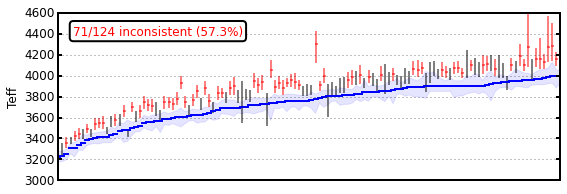

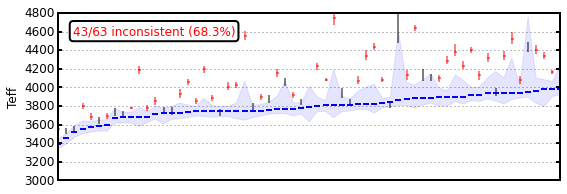

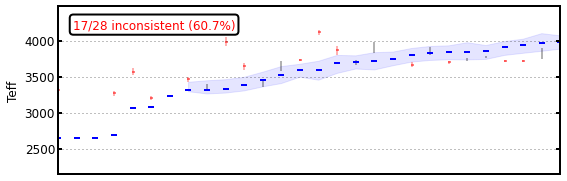

In [19]:
mpld3.enable_notebook()
huber_compare(query='teff < 4000 and teff_prov=="PHO2"', prop='Teff', lw=2, ylim=(3000, 4600));
huber_compare(query='teff < 4000 and teff_prov=="SPE5"', prop='Teff', lw=2, ylim=(3000, 4800))
huber_compare(query='teff < 4000 and teff_prov=="PHO54"', prop='Teff', lw=2)
print(len(huber_sp.query('teff < 4000')))
huber_sp.query('teff < 4000').groupby('teff_prov').count()

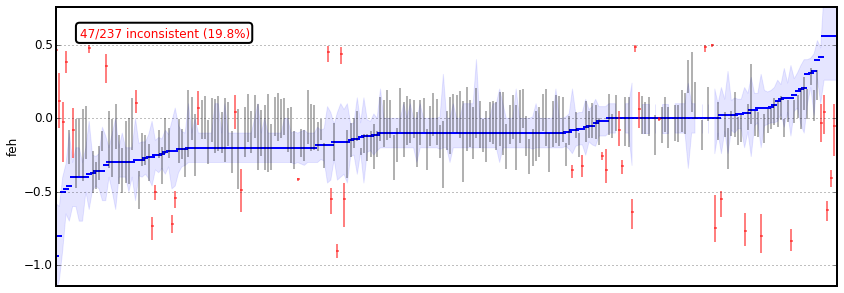

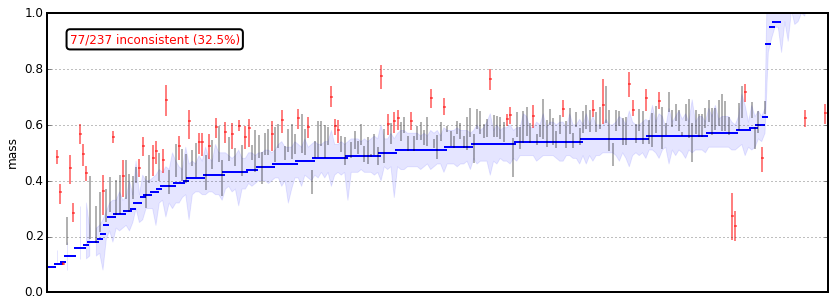

In [19]:
huber_compare(query='teff < 4000', prop='feh', lw=2)
ax = huber_compare(query='teff < 4000', prop='mass', lw=2, ylim=(0,1))

In [11]:
plt.close('all')
def teff_compare_plots():
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
    huber_compare(query='teff > 6500', ax=ax1, lw=1, alpha_lines=0.3)
    ax1.set_yticks(ax1.get_yticks()[1:])
    ax1.set_ylabel('Effective Temperature [K]', fontsize=12)
    huber_compare(query='4500 < teff <= 6500', ax=ax2, alpha_lines=0.2)
    ax2.set_yticks(ax2.get_yticks()[1:])
    ax2.set_ylabel('Effective Temperature [K]', fontsize=12)
    huber_compare(query='teff <= 4500', ax=ax3, lw=1, alpha_lines=0.3)
    ax3.set_ylim(ymin=2500)
    ax3.set_ylabel('Effective Temperature [K]', fontsize=12)
    plt.subplots_adjust(hspace=0)
    plt.savefig('figures/hubercompare_teff.pdf')
    return fig

fig = teff_compare_plots();

/Users/tdm/anaconda/lib/python2.7/site-packages/bokeh/compat/bokeh_renderer.py:212: UserWarning: Unable to handle marker: _; defaulting to Circle
  warnings.warn("Unable to handle marker: %s; defaulting to Circle" % style['marker'])


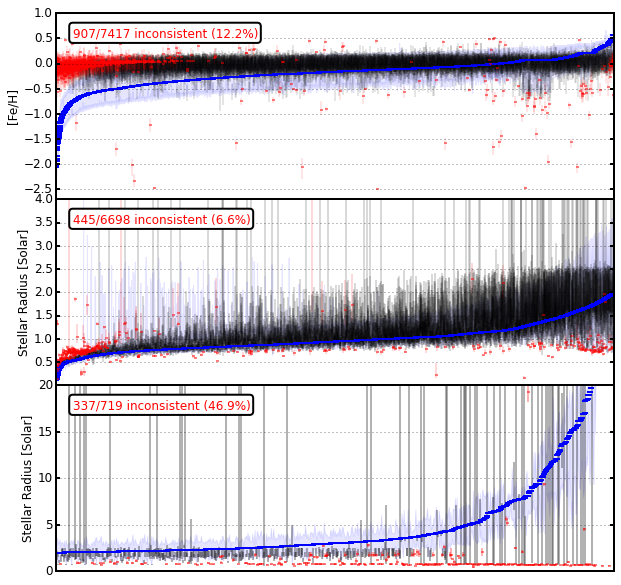

In [7]:
def feh_radius_compare():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))
    huber_compare(prop='feh', ax=ax1, alpha_lines=0.1)
    ax1.set_yticks(ax1.get_yticks()[1:])
    ax1.set_ylabel('[Fe/H]', fontsize=12)
    huber_compare(prop='radius', query='radius <= 2', ylim=(0,4), ax=ax2, alpha_lines=0.15);
    ax2.set_yticks(ax2.get_yticks()[1:])
    ax2.set_ylabel('Stellar Radius [Solar]', fontsize=12)
    huber_compare(prop='radius', query='2 < radius', ylim=(0,20), lw=1, ax=ax3)
    ax3.set_ylabel('Stellar Radius [Solar]', fontsize=12)
    plt.subplots_adjust(hspace=0)
    plt.savefig('figures/hubercompare_fehradius.pdf')
    
feh_radius_compare()

In [96]:
plt.subplots_adjust?

In [11]:
print(fpp_all.columns)
print(sp.columns)

Index([u'koi.1', u'rprs', u'secthresh', u'maxrad', u'pr_heb', u'pr_eb',
       u'pr_beb', u'L_tot', u'fp', u'FPP', u'kepid', u'period', u'rp',
       u'disposition', u'prob_ontarget', u'pos_prob_score', u'not_transitlike',
       u'significant_secondary', u'centroid_offset', u'ephem_match',
       u'exception'],
      dtype='object')
Index([u'koi', u'mass', u'mass_lo', u'mass_hi', u'radius', u'radius_lo',
       u'radius_hi', u'Teff', u'Teff_lo', u'Teff_hi', u'logg', u'logg_lo',
       u'logg_hi', u'feh', u'feh_lo', u'feh_hi', u'age', u'age_lo', u'age_hi',
       u'distance', u'distance_lo', u'distance_hi', u'AV', u'AV_lo', u'AV_hi',
       u'maxAV', u'Teff_prior_mu', u'Teff_prior_sig', u'logg_prior_mu',
       u'logg_prior_sig', u'feh_prior_mu', u'feh_prior_sig'],
      dtype='object')


In [44]:
fpp_all.groupby('exception').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_eb,pr_beb,L_tot,fp,FPP,kepid,period,rp,disposition,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match
exception,,,,,,,,,,,,,,,,,,,,
AllWithinRocheError,38,38,38,38,0,0,0,0,0,0,38,38,37,38,28,36,38,38,38,38
BadRoweFitError,210,0,0,0,0,0,0,0,0,0,210,210,0,210,131,166,210,210,210,210
EmptyPhotometryError,38,0,0,0,0,0,0,0,0,0,38,38,0,38,20,23,38,38,38,38
EmptyPopulationError,17,17,17,17,0,0,0,0,0,0,17,17,17,17,0,17,17,17,17,17
MCMCError,18,18,18,18,0,0,0,0,0,0,18,18,18,18,8,9,18,18,18,18
MissingKOIError,971,0,0,0,0,0,0,0,0,0,971,971,0,971,380,432,971,971,971,971
MissingStellarError,80,80,80,80,0,0,0,0,0,0,80,80,0,80,36,73,80,80,80,80
NoWeakSecondaryError,82,0,0,0,0,0,0,0,0,0,82,82,0,82,4,8,82,82,82,82
ValueError,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1


In [48]:
def write_nexsci_table():
    filename = 'nexsci_fpp.csv'
    
    column_names = {'koi.1':'kepoi_name', 'kepid':'kepid',
                   'Teff':'fpp_steff', 'logg':'fpp_slogg',
                   'feh':'fpp_smet', 'radius':'fpp_srad',
                   'mass':'fpp_smass', 'age':'fpp_sage',
                   'distance':'fpp_dist', 'AV':'fpp_av',
                   'maxAV':'fpp_max_av', 'period':'koi_period',
                   'Teff_prior_mu':'fpp_pr_steff_mu', 'Teff_prior_sig':'fpp_pr_steff_sig',
                   'logg_prior_mu':'fpp_pr_slogg_mu', 'logg_prior_sig':'fpp_pr_slogg_sig',
                   'feh_prior_mu':'fpp_pr_smet_mu', 'feh_prior_sig':'fpp_pr_smet_sig',
                   'rprs':'fpp_ror', 'rp':'fpp_prad', 'secthresh':'fpp_secthresh',
                   'maxrad':'fpp_maxrad', 'pr_heb':'fpp_prob_heb',
                   'pr_eb':'fpp_prob_ueb', 'pr_beb':'fpp_prob_beb',
                   'fp':'fpp_spec_occrate', 'FPP':'fpp_prob', 'L_tot':'fpp_score',
                   'exception':'fpp_fail_reason'}
    
    has_error = ['Teff', 'logg', 'feh', 'radius', 'mass', 'age', 'distance', 'av']
    
    star_columns = ['Teff', 'logg', 'feh', 'radius', 'mass', 'age', 'distance',
                   'AV', 'maxAV', 'Teff_prior_mu', 'Teff_prior_sig',
                   'logg_prior_mu', 'logg_prior_sig', 'feh_prior_mu', 'feh_prior_sig']
    fpp_columns = ['koi.1', 'kepid', 'period', 'rprs', 'rp', 'secthresh', 'maxrad', 
                   'pr_heb', 'pr_eb', 'pr_beb', 'fp', 'FPP', 'L_tot', 'exception']  

    # Failure classes:
    #  1:  No MCMC modeling from JRowe (MissingKOIError, EmptyPhotometryError)
    #  2:  Bad MCMC model from JRowe (BadRoweFitError)
    #  3:  No stellar params from Huber table (MissingStellarError)
    #  4:  No weak secondary data (NoWeakSecondaryError)
    #  5:  MCMC trapezoid fit did not converge (MCMCError)
    #  6:  Period too short for implied star (AllWithinRocheError)
    #  7:  Other (EmptyPopulationError, ValueError, ZeroDivisionError)
    exceptions = {'AllWithinRocheError': 'UnphysicalPeriod',
                 'BadRoweFitError': 'UnphysicalMCMC',
                 'EmptyPhotometryError': 'NoMCMC',
                 'EmptyPopulationError': 'Other',
                 'MCMCError': 'TrapMCMCNotConverged',
                 'MissingKOIError': 'NoMCMC',
                 'MissingStellarError': 'NoStellar',
                 'NoWeakSecondaryError': 'NoSeconary',
                 'ValueError': 'Other',
                 'ZeroDivisionError': 'Other'}
    
    formats = {'koi.1':'{:s}',
            'disposition':'{:s}',
            'period':'{:.3f}',
            'rp':'{:.2f}',
            'rprs':'{:.3f}',
            'secthresh':'{:.0f}',
            'maxrad':'{:.2f}',
            'pr_heb':'{:.2g}',
            'pr_eb':'{:.2g}',
            'pr_beb':'{:.2g}',
            'pr_heb':'{:.2g}',
            'L_tot':'{:.2g}',
            'fp':'{:.3f}',
             'FPP':'{:.2g}',
             'kepid':'{:.0f}',
         'prob_ontarget':'{:.2f}',
         'pos_prob_score':'{:.2f}',
         'exception':'{}',
            'mass':'{:.2f}',
           'radius':'{:.2f}',
           'Teff': '{:.0f}',
           'logg': '{:.2f}',
           'feh': '{:.2f}',
           'age': '{:.2f}',
           'distance': '{:.0f}',
           'AV' : '{:.2f}',
            'maxAV':'{:.2f}',
            'Teff_prior_mu':'{:.0f}', 'Teff_prior_sig':'{:.0f}',
            'logg_prior_mu':'{:.2f}', 'logg_prior_sig':'{:.2f}',
            'feh_prior_mu':'{:.2f}', 'feh_prior_sig':'{:.2f}'}

    
    columns = fpp_columns + star_columns
    
    fout = open(filename, 'w')
    line = ''
    for c in columns:
        cn = column_names[c]
        line += '{},'.format(cn)
        if c in has_error:
            line += '{0}_err1,{0}_err2,'.format(cn)
    line = line[:-1]
    line += '\n'
    fout.write(line)
    
    for k in fpp_all.index:
        line = ''
        koistar = ku.koistar(k)
        for c in columns:
            fmt = formats[c]
            if c in fpp_columns:
                if c=='exception':
                    try:
                        val = exceptions[fpp_all.ix[k,c]]
                    except KeyError:
                        val = ''
                else:
                    val = fpp_all.ix[k, c]
            else:
                if koistar in sp.index:
                    val = sp.ix[koistar, c]
                else:
                    val = np.nan
                
            line += '{},'.format(fmt).format(val)

            if c in has_error:
                if koistar in sp.index:
                    err1 = sp.ix[koistar, '{}_hi'.format(c)] - val
                    err2 = sp.ix[koistar, '{}_lo'.format(c)] - val
                else:
                    err1, err2 = np.nan, np.nan
                    
                line += '{},{},'.format(err1,err2)

        line = line[:-1]
        line += '\n'
        fout.write(line)
        
    fout.close()
        
write_nexsci_table()

In [41]:
nexsci = pd.read_csv('nexsci_fpp.csv')
nexsci.count()

kepoi_name          8826
kepid               8826
koi_period          8826
fpp_ror             7525
fpp_prad            7431
fpp_secthresh       7525
fpp_maxrad          7525
fpp_prob_heb        7242
fpp_prob_ueb        7242
fpp_prob_beb        7242
fpp_spec_occrate    7370
fpp_prob            7242
fpp_score           7370
fpp_steff           8678
fpp_steff_err1      8678
fpp_steff_err2      8678
fpp_slogg           8678
fpp_slogg_err1      8678
fpp_slogg_err2      8678
fpp_smet            8678
fpp_smet_err1       8678
fpp_smet_err2       8678
fpp_srad            8678
fpp_srad_err1       8678
fpp_srad_err2       8678
fpp_smass           8678
fpp_smass_err1      8678
fpp_smass_err2      8678
fpp_sage            8678
fpp_sage_err1       8678
fpp_sage_err2       8678
fpp_sdist           8678
fpp_sdist_err1      8678
fpp_sdist_err2      8678
fpp_av              8678
fpp_max_av          8678
fpp_pr_steff_mu      724
fpp_pr_steff_sig     724
fpp_pr_slogg_mu      724
fpp_pr_slogg_sig     724


In [39]:
sp.ix['K00043']

KeyError: 'K00043'